# 3 Observations:

1) Temperature indeed increases closer to 0 latitude and decreases farther away, especially around 60 degrees
2) The wind was faster in the Northern hemisphere at the time
3) Humidity is more likely to drop the closer you get to the equator
4) If you squint really hard, the plot of cloudiness looks like a knight riding a horse

In [17]:
# Dependencies
import requests
import json
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy
from secrets import future

In [18]:
# Make a list of 501 cities chosen by random latitude and longitude

# Empty lists to be filled
city_list = []
country_code_list = []
lat_list = []
lon_list = []

# Until citylists is populated by 500 cities, keep doing things
while len(city_list) <= 500:
    lat = random.randint(-180, 181)
    lon = random.randint(-90, 91)
    city = citipy.nearest_city(lat, lon)
    if city.city_name not in city_list:
        city_list.append(city.city_name)
        country_code_list.append(city.country_code)
        lat_list.append(lat)
        lon_list.append(lon)
#print(citylist)

In [19]:
# Make it a dataframe
weather_df = pd.DataFrame({"City Name": city_list, 
                        "Country Code": country_code_list, 
                        "Latitude": lat_list, 
                        "Longitude": lon_list,
                        "Temperature": "",
                        "Humidity (%)": "",
                        "Cloudiness (%)": "",
                        "Wind Speed": ""})
weather_df = weather_df[["City Name", "Country Code", "Latitude", "Longitude", "Temperature", "Humidity (%)", "Cloudiness (%)", "Wind Speed"]]
weather_df.head()

,City Name,Country Code,Latitude,Longitude,Temperature,Humidity (%),Cloudiness (%),Wind Speed
0,mahebourg,mu,-23,60,,,,
1,tokzar,af,36,67,,,,
2,caravelas,br,-19,-32,,,,
3,umm lajj,sa,25,39,,,,
4,dikson,ru,145,62,,,,


In [21]:
# URL, prepare DataFrame
weather_url = "http://api.openweathermap.org/data/2.5/weather?q="

# GET THE WEATHER
for index, key in weather_df.iterrows():
    lat = 0
    lon = 0
    temperature = 0
    humidity = 0
    clouds = 0
    wind_speed = 0
    
    city = f"{key['City Name']},{key['Country Code']}"
    url = f"{weather_url}{city}&units=imperial&apikey={future}"
#     url = url.replace(" ", "+")

    # Take my api key out of the url that will be displayed
    safe_url = url.replace(future, "SECRET")
    
    # Print log
    print(f"Collecting data for city #{index}: {key['City Name']}")
    print(f"From URL: {safe_url}")
    json = requests.get(url).json()
    try:
        lat = json["coord"]["lat"]
        lon = json["coord"]["lon"]
        temperature = json["main"]["temp"]
        humidity = json["main"]["humidity"]
        clouds = json["clouds"]["all"]
        wind_speed = json["wind"]["speed"]
    except:
        print(f"Error Gathering Data for {city}")
    
    weather_df.set_value(index, "Latitude", lat)
    weather_df.set_value(index, "Longitude", lon)
    weather_df.set_value(index, "Temperature", temperature)
    weather_df.set_value(index, "Humidity (%)", humidity)
    weather_df.set_value(index, "Cloudiness (%)", clouds)
    weather_df.set_value(index, "Wind Speed", wind_speed)


print("------------------------")
print("Data collection complete")

From URL: http://api.openweathermap.org/data/2.5/weather?q=mahebourg,mu&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?q=tokzar,af&units=imperial&apikey=SECRET
Error Gathering Data for tokzar,af
From URL: http://api.openweathermap.org/data/2.5/weather?q=caravelas,br&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?q=umm lajj,sa&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?q=dikson,ru&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?q=tasiilaq,gl&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?q=cockburn town,tc&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?q=qaanaaq,gl&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?q=port elizabeth,za&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?

From URL: http://api.openweathermap.org/data/2.5/weather?q=narsaq,gl&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?q=klaksvik,fo&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?q=axim,gh&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?q=bathsheba,bb&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?q=algiers,dz&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?q=torbay,ca&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?q=itarema,br&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?q=east london,za&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?q=marsaxlokk,mt&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?q=baghdad,iq&units=imperial&apikey=SECRET
From 

From URL: http://api.openweathermap.org/data/2.5/weather?q=jupiter,us&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?q=olafsvik,is&units=imperial&apikey=SECRET
Error Gathering Data for olafsvik,is
From URL: http://api.openweathermap.org/data/2.5/weather?q=tasbuget,kz&units=imperial&apikey=SECRET
Error Gathering Data for tasbuget,kz
From URL: http://api.openweathermap.org/data/2.5/weather?q=kruisfontein,za&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?q=iqaluit,ca&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?q=bandarbeyla,so&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?q=belmonte,br&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?q=urucara,br&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?q=berlevag,no&units=imperial&apikey=SECRET
From URL: http://api.o

From URL: http://api.openweathermap.org/data/2.5/weather?q=tursunzoda,tj&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?q=talcahuano,cl&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?q=husavik,is&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?q=padang,id&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?q=placido de castro,br&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?q=natal,br&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?q=port-gentil,ga&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?q=hunza,pk&units=imperial&apikey=SECRET
Error Gathering Data for hunza,pk
From URL: http://api.openweathermap.org/data/2.5/weather?q=atar,mr&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?q=kpan

Error Gathering Data for warqla,dz
From URL: http://api.openweathermap.org/data/2.5/weather?q=muli,mv&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?q=jatibonico,cu&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?q=taoudenni,ml&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?q=azar shahr,ir&units=imperial&apikey=SECRET
Error Gathering Data for azar shahr,ir
From URL: http://api.openweathermap.org/data/2.5/weather?q=turayf,sa&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?q=yantzaza,ec&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?q=mamallapuram,in&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?q=bhaderwah,in&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?q=uba,br&units=imperial&apikey=SECRET
Error Gathering Data for ub

From URL: http://api.openweathermap.org/data/2.5/weather?q=campo verde,br&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?q=mehamn,no&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?q=maragogi,br&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?q=gberia fotombu,sl&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?q=pastavy,by&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?q=astana,kz&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?q=kavali,in&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?q=kapiri mposhi,zm&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?q=marzuq,ly&units=imperial&apikey=SECRET
Error Gathering Data for marzuq,ly
From URL: http://api.openweathermap.org/data/2.5/weather?q=g

From URL: http://api.openweathermap.org/data/2.5/weather?q=thunder bay,ca&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?q=paita,pe&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?q=usinsk,ru&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?q=mzimba,mw&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?q=xai-xai,mz&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?q=liverpool,ca&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?q=ferkessedougou,ci&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?q=kidal,ml&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?q=pital,cr&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?q=banda aceh,id&units=imperial&apikey=SECRET
Fr

Error Gathering Data for mouzakion,gr
From URL: http://api.openweathermap.org/data/2.5/weather?q=naryan-mar,ru&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?q=vestmanna,fo&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?q=dzhusaly,kz&units=imperial&apikey=SECRET
Error Gathering Data for dzhusaly,kz
From URL: http://api.openweathermap.org/data/2.5/weather?q=kostino,ru&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?q=syasstroy,ru&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?q=kargasok,ru&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?q=borujerd,ir&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?q=rosita,ni&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?q=kedrovyy,ru&units=imperial&apikey=SECRET
From URL: http://api.ope

From URL: http://api.openweathermap.org/data/2.5/weather?q=kisangani,cd&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?q=buenavista,co&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?q=salinas,ec&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?q=mandali,iq&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?q=thurso,gb&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?q=duz,tn&units=imperial&apikey=SECRET
Error Gathering Data for duz,tn
From URL: http://api.openweathermap.org/data/2.5/weather?q=itaituba,br&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?q=urbana,us&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?q=tres arroyos,ar&units=imperial&apikey=SECRET
From URL: http://api.openweathermap.org/data/2.5/weather?q=kavaratti,in&

In [27]:
# Wrangle Datums
weather_df.to_csv("Weathers.csv", index=False)
weather_df.head()

,City Name,Country Code,Latitude,Longitude,Temperature,Humidity (%),Cloudiness (%),Wind Speed
0,mahebourg,mu,-20,57,84.2,74,75,21.92
1,tokzar,af,0,0,0,0,0,0
2,caravelas,br,-17,-39,81.31,100,0,15.84
3,umm lajj,sa,25,37,82.21,55,0,7.56
4,dikson,ru,73,80,-0.1,97,64,14.61


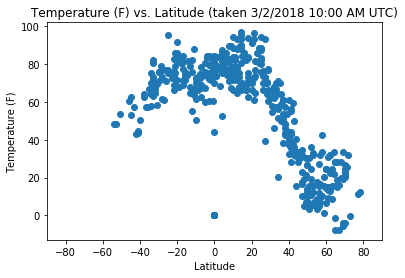

In [28]:
# Graphs
# Temperature (F) vs Latitude
plt.scatter(weather_df["Latitude"], weather_df["Temperature"])
plt.title("Temperature (F) vs. Latitude (taken 3/2/2018 10:00 AM UTC)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.xlim(-90, 90)
plt.savefig("TemperatureVsLatitude.png")
plt.show()

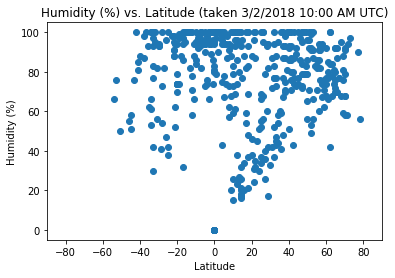

In [29]:
# Humidity (%) vs Latitude
plt.scatter(weather_df["Latitude"], weather_df["Humidity (%)"])
plt.title("Humidity (%) vs. Latitude (taken 3/2/2018 10:00 AM UTC)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(-90, 90)
plt.savefig("HumidityVsLatitude.png")
plt.show()

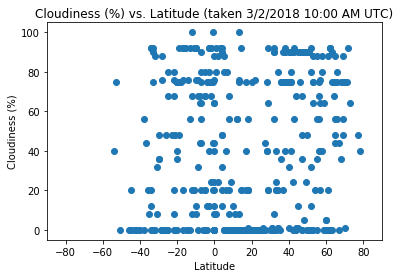

In [30]:
# Cloudiness (%) vs Latitude
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness (%)"])
plt.title("Cloudiness (%) vs. Latitude (taken 3/2/2018 10:00 AM UTC)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(-90, 90)
plt.savefig("HumidityVsCloudiness.png")
plt.show()

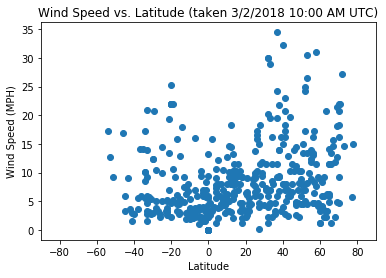

In [31]:
# Wind Speed vs Latitude
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"])
plt.title("Wind Speed vs. Latitude (taken 3/2/2018 10:00 AM UTC)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.xlim(-90, 90)
plt.savefig("HumidityVsWindspeed.png")
plt.show()